In [ ]:
# Mount Google Drive (if necessary)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Set base directory (replace with your actual path)
base_dir = "/content/drive/MyDrive/Real and Fake Face Detection Dataset"


In [ ]:
import os
# Define paths to 'Real' and 'Fake' folders
fake_dir = os.path.join(base_dir, 'Fake')
real_dir = os.path.join(base_dir, 'Real')

In [ ]:
# Import libraries

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
import cv2
import numpy as np

In [ ]:
# Create lists of image paths
fake_files = os.listdir(fake_dir)
real_files = os.listdir(real_dir)
fake_images = [os.path.join(fake_dir, f) for f in fake_files]
real_images = [os.path.join(real_dir, f) for f in real_files]


In [ ]:

# Combine images and labels
X = fake_images + real_images
y = [0] * len(fake_images) + [1] * len(real_images)


In [ ]:
# Split data into training, validation, and test sets
X_train, X_test_val, y_train, y_test_val = train_test_split(X, y, test_size=0.2, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val, test_size=0.5, random_state=42)

In [ ]:

# Preprocess images (resize and normalize)
def preprocess_image(img_path):
  img = cv2.imread(img_path)
  img = cv2.resize(img, (224, 224))
  img = img.astype('float32') / 255.0
  return img


In [ ]:

X_train = np.array([preprocess_image(img) for img in X_train])
X_test = np.array([preprocess_image(img) for img in X_test])
X_val = np.array([preprocess_image(img) for img in X_val])

In [ ]:
# Convert labels to numpy arrays
y_train = np.array(y_train)
y_val = np.array(y_val)
y_test = np.array(y_test)

In [ ]:
import os
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16
from keras.applications.resnet50 import ResNet50
from keras.applications.inception_v3 import InceptionV3
from keras.layers import Input, Concatenate, Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from keras.models import Model
from keras.optimizers import Adam

In [ ]:
# Load the pre-trained models
vgg16_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
resnet50_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
inceptionv3_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [ ]:
# Freeze the layers of the pre-trained models
for layer in vgg16_model.layers:
    layer.trainable = False
for layer in resnet50_model.layers:
    layer.trainable = False
for layer in inceptionv3_model.layers:
    layer.trainable = False

In [ ]:
from keras.layers import Concatenate, Dense, Dropout, GlobalAveragePooling2D
# Create the input layer
input_layer = Input(shape=(224, 224, 3))

# Extract features using the pre-trained models
vgg16_features = vgg16_model(input_layer)
resnet50_features = resnet50_model(input_layer)
inceptionv3_features = inceptionv3_model(input_layer)

# Add a Dense layer to each feature map to ensure they have the same number of features
vgg16_features = Dense(512, activation='relu')(vgg16_features)
resnet50_features = Dense(512, activation='relu')(resnet50_features)
inceptionv3_features = Dense(512, activation='relu')(inceptionv3_features)

# Add a GlobalAveragePooling2D layer to each feature map to reduce to 1D
vgg16_features = GlobalAveragePooling2D()(vgg16_features)
resnet50_features = GlobalAveragePooling2D()(resnet50_features)
inceptionv3_features = GlobalAveragePooling2D()(inceptionv3_features)

# Concatenate the features
combined_features = Concatenate()([vgg16_features, resnet50_features, inceptionv3_features])




In [ ]:
from keras.layers import GlobalMaxPooling2D

# Add convolutional, normalization layers
x = Reshape((1, 1, 1536))(combined_features)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)

# Use GlobalMaxPooling2D instead of MaxPooling2D
x = GlobalMaxPooling2D()(x)

# Add a fully connected layer
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
output_layer = Dense(1, activation='sigmoid')(x)

# Create the final model
model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
from keras.callbacks import EarlyStopping

# Train the model
history = model.fit(X_train, y_train,
          batch_size=32,
          epochs=50,
          validation_data=(X_val, y_val),
          callbacks=[EarlyStopping(monitor='val_loss', patience=5)])

Epoch 1/50
53/53 [==============================] - 1841s 34s/step - loss: 0.7572 - accuracy: 0.5338 - val_loss: 0.6921 - val_accuracy: 0.5143
Epoch 2/50
53/53 [==============================] - 1829s 35s/step - loss: 0.6787 - accuracy: 0.6049 - val_loss: 0.6987 - val_accuracy: 0.5571
Epoch 3/50
53/53 [==============================] - 1805s 34s/step - loss: 0.6334 - accuracy: 0.6551 - val_loss: 0.6863 - val_accuracy: 0.5667
Epoch 4/50
53/53 [==============================] - 1908s 36s/step - loss: 0.5378 - accuracy: 0.7292 - val_loss: 0.9228 - val_accuracy: 0.4476
Epoch 5/50
53/53 [==============================] - 1819s 34s/step - loss: 0.4890 - accuracy: 0.7711 - val_loss: 0.7230 - val_accuracy: 0.6238
Epoch 6/50
 4/53 [=>............................] - ETA: 25:55 - loss: 0.5068 - accuracy: 0.7812

In [1]:
# # Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')

Test loss: 0.5793
Test accuracy: 0.7132


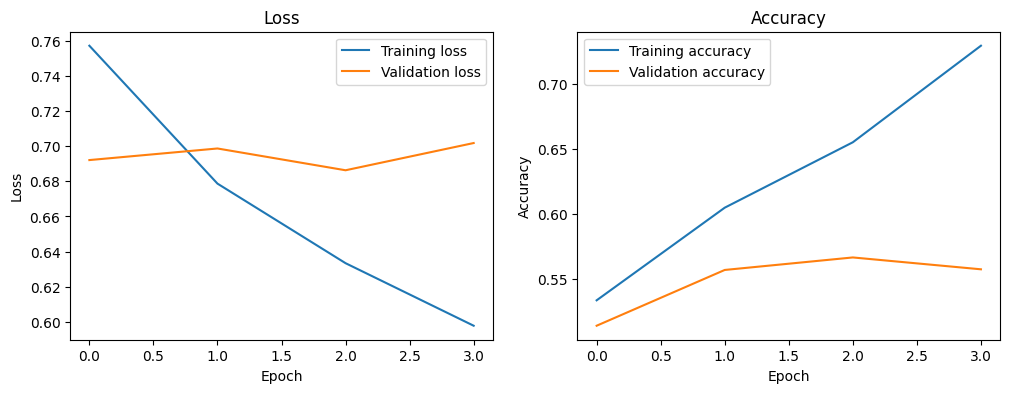

In [ ]:
# Plot the loss and accuracy
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Plot the loss
ax1.plot(history.history['loss'], label='Training loss')
ax1.plot(history.history['val_loss'], label='Validation loss')
ax1.set_title('Loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend()

# Plot the accuracy
ax2.plot(history.history['accuracy'], label='Training accuracy')
ax2.plot(history.history['val_accuracy'], label='Validation accuracy')
ax2.set_title('Accuracy')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.legend()

plt.show()